# פתירת משוואות באמצעות הנוסחא
# AX = B

# תרגיל 4:

## פתרון ידני:

### 3x - 2y -4z = 4
### x - 2z +3y = 8
### 2x -4y +3z = 3


### 3x - 2y -4z = 4
### x +3y - 2z = 8
### 2x -4y +3z = 3


In [ ]:
A = [3, -2, -4]    X = [x]    B = [4]  
    [1,  3, -2]        [y]        [8]
    [2, -4,  3]        [z]        [3]

In [ ]:
det = 3(3*3-(-2*-4)) -(-2(1*3-(-2*2))) +4(1*-4-(3*2)) = 3(9-8)+2(3+4)+(-4)*(-4-6) = 3+14+40

### det = 57

In [ ]:
C(11) = (3*3)-(-2*-4) = 9-8 = 1                                     [1, -7,-10]
C(12) = (1*3)-(-2*2) = 3-(-4) = 7  --->  -7                          [22, 17, 8]
C(13) = (1*-4)-(3*2) = -4-6 = -10                                    [16, 2, 11]
C(21) = (-2*3)-(-4*-4) = -6-16 = -22 ---->  22                        
C(22) = (3*3)-(-4*2) = 9+8 = 17
C(23) = (3*-4)-(-2*2) = -12+4 = -8 ---->  8
C(31) = (-2*-2)-(-4*3) = 4+12 = 16
C(32) = (3*-2)-(-4*1) = -6+4 = -2 ---->  2
C(33) = (3*3)-(-2*1) = 9+2 = 11

In [ ]:
Transpose, adj = [1, 22, 16]
                 [-7, 17, 2]
                 [-10,8, 11]

## A^-1 = 1/det(A) * adj(A)

In [ ]:
A^-1 = 1/57 * [1, 22, 16] =    [1/57, 22/57, 16/57 ]
              [-7, 17, 2]      [-7/57, 17/57, 2/57 ]
              [-10,8, 11]      [-10/57, 8/57, 11/57] 

## X = A^-1 * B

In [ ]:
X =  [1/57, 22/57, 16/57 ] * [4]
     [-7/57, 17/57, 2/57 ]   [8]
     [-10/57, 8/57, 11/57]   [3] 

In [ ]:
X = [(4 * 1) + (8 * 22) + (3 * 16) / 57] = 4+176+48/57 = 228/57 = 4
    [(-7 * 4) + (17 * 8) + (2 * 3) /57] = -28+136+6/57 = 114/57 = 2
    [(-10 * 4) + (8 * 8) + (11 * 3) / 57] = -40+64+33/57 = 57/57 = 1

### X =
###   [4]
###   [2]
###   [1]


## x = 4, y = 2, z = 1

# פתרון בקוד:

In [31]:
import numpy as np

def solve_linear_system(coefficients, constants):
    """
    Function to solve a system of linear equations with any number of unknowns
    
    :param coefficients: Coefficient matrix of the equations. nxn matrix
    :param constants: Vector of constant terms [b1, b2, ..., bn]
    :return: Solution of the system and details of calculation method
    """
    
    # Convert inputs to numpy arrays
    A = np.array(coefficients, dtype=float)
    b = np.array(constants, dtype=float)
    
   # Validate input dimensions
    n = b.shape[0]  # Number of equations/unknowns
    if A.shape != (n, n):
        raise ValueError(f"Input must be a system of {n} equations with {n} unknowns")
        
    results = {}
    
    det_A = np.linalg.det(A)
    
    if abs(det_A) < 1e-10:
        results["inverse"] = "Cannot compute inverse (singular matrix)"
    else:
         # Calculate inverse of coefficient matrix
        A_inv = np.linalg.inv(A)  # 1/det * adj = 1/det * [Cof^T}
        
        # Calculate solution x = A^(-1) * b
        solution = np.dot(A_inv, b)
        
        results["inverse"] = {
            "A_inverse": A_inv.tolist(),
            "solution": solution.tolist()
        }
       
    return results

# Example system:
# 3x + 2y = 14
# 2x + 5y = 19
### x – y = 8
### 3x + 2y = 24

coefficients = [[3, -2, -4], [1,  3, -2], [2, -4,  3]]
constants = [4, 8, 3]

results = solve_linear_system(coefficients, constants)

print("System of equations:")
print(f"{coefficients[0][0]}x {coefficients[0][1]}y {coefficients[0][2]}z = {constants[0]}")
print(f"{coefficients[1][0]}x {coefficients[1][2]}z + {coefficients[1][1]}y = {constants[1]}")
print(f"{coefficients[2][0]}x {coefficients[2][1]}y + {coefficients[2][2]}z = {constants[2]}")
print("\nResults:")

for method, result in results.items():
    if isinstance(result, dict):
        if "solution" in result:
            print(f"Solution: x = {result['solution'][0]:.2f}, y = {result['solution'][1]:.2f}, z = {result['solution'][2]:.2f}")
        for key, value in result.items():
            if key != "solution":
                print(f"{key}: {value}")
    else:
        print(result)


System of equations:
3x -2y -4z = 4
1x -2z + 3y = 8
2x -4y + 3z = 3

Results:
Solution: x = 4.00, y = 2.00, z = 1.00
A_inverse: [[0.01754385964912278, 0.3859649122807018, 0.28070175438596495], [-0.12280701754385966, 0.2982456140350877, 0.035087719298245626], [-0.1754385964912281, 0.1403508771929825, 0.19298245614035092]]


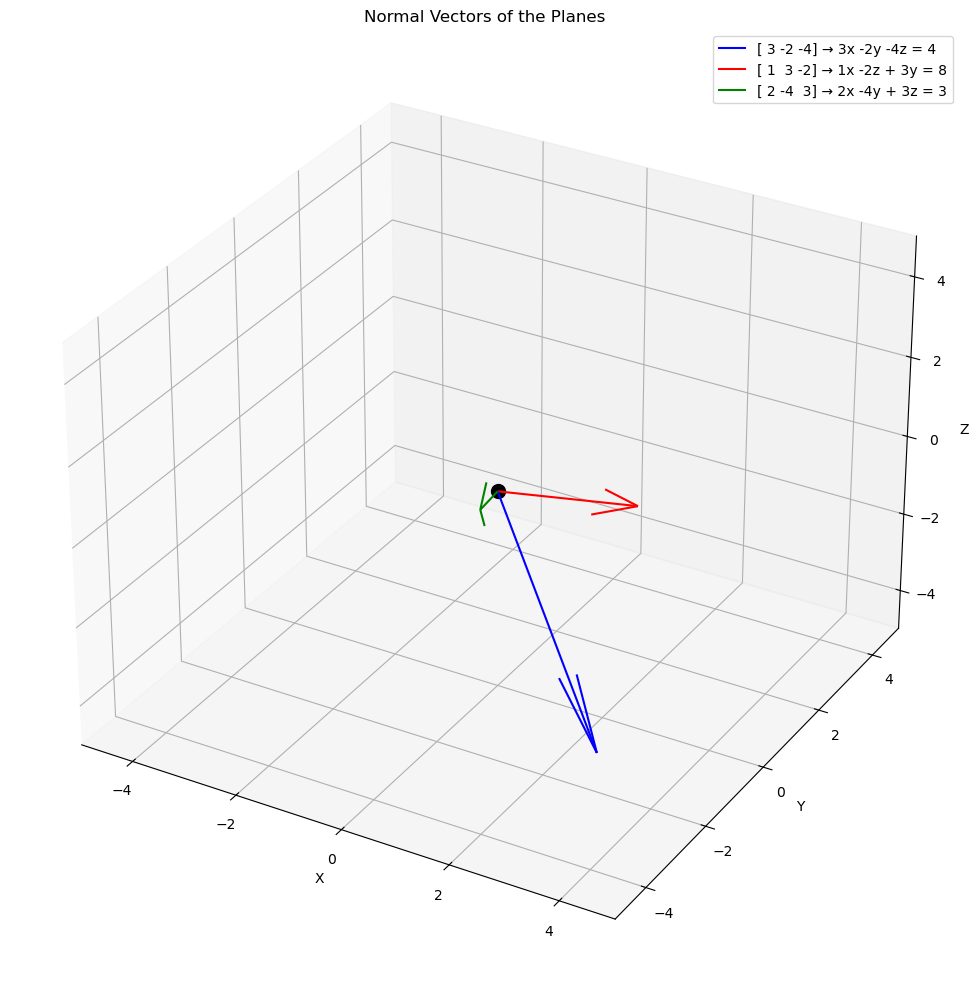

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_three_vectors(coefficients, constants):
    """
    Plots the coefficient vectors of three 3D linear equations (planes).
    """
    vec1 = np.array(coefficients[0])
    vec2 = np.array(coefficients[1])
    vec3 = np.array(coefficients[2])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot origin
    ax.scatter(0, 0, 0, color='k', s=100)

    # Plot the 3 vectors
    ax.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], color='blue', label=f'{vec1} → 3x -2y -4z = 4')
    ax.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], color='red', label=f'{vec2} → 1x -2z + 3y = 8')
    ax.quiver(0, 0, 0, vec3[0], vec3[1], vec3[2], color='green', label=f'{vec3} → 2x -4y + 3z = 3')

    # Axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Title and legend
    ax.set_title('Normal Vectors of the Planes')
    ax.legend()

    # Set equal scaling
    all_vecs = np.array([vec1, vec2, vec3])
    max_range = np.max(np.abs(all_vecs)) + 1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])

    plt.tight_layout()
    plt.show()

# Your system
coefficients = [[3, -2, -4], [1,  3, -2], [2, -4,  3]]
constants = [4, 8, 3]

plot_three_vectors(coefficients, constants)
